# Loan Approval Task - Shahin Hussain

In [111]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Data Path:
DATA_PATH = "loan_approval_dataset.csv"

## Exploratory Data Analysis

We will use some libraries besides NumPy for this stage.

In [113]:
# Load data
df = pd.read_csv(DATA_PATH)
df.columns = [c.strip() for c in df.columns]
print(df.shape)
df.head(3)

(4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


### Initial checks on all data

In [114]:
# Data types
df.info()

# Missing values
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [115]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [116]:
df[df.duplicated(keep=False)]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [117]:
counts = df["loan_status"].value_counts()
percentages = df["loan_status"].value_counts(normalize=True).mul(100).round(2)

summary = (counts.astype(str) + " (" + percentages.astype(str) + "%)")
print(summary)

loan_status
Approved    2656 (62.22%)
Rejected    1613 (37.78%)
dtype: object


**Notes**:
- Target variables are categorical (two values) -> This is a classification problem.
- No null values for the entire dataset so no imputation is required.
- There are no duplicates, so every row represents a different loan.
- There are 4269 rows and 13 columns. loan_id is just an identifier column, so we will not include this in our model.
- About 62.2% (2656 rows) of the data correspond to approved loans, the rest correspond to rejected loans. The target variable loan_status is slightly imbalanced but not severely.

### Data Analysis

In [118]:
df.drop(["loan_id"], axis=1, inplace=True) # loan_id are unique loan identifiers and so not needed.

In [119]:
# Seperate numeric and categorical columns to focus analysis on each type.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()   
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

numeric_cols, categorical_cols

(['no_of_dependents',
  'income_annum',
  'loan_amount',
  'loan_term',
  'cibil_score',
  'residential_assets_value',
  'commercial_assets_value',
  'luxury_assets_value',
  'bank_asset_value'],
 ['education', 'self_employed', 'loan_status'])

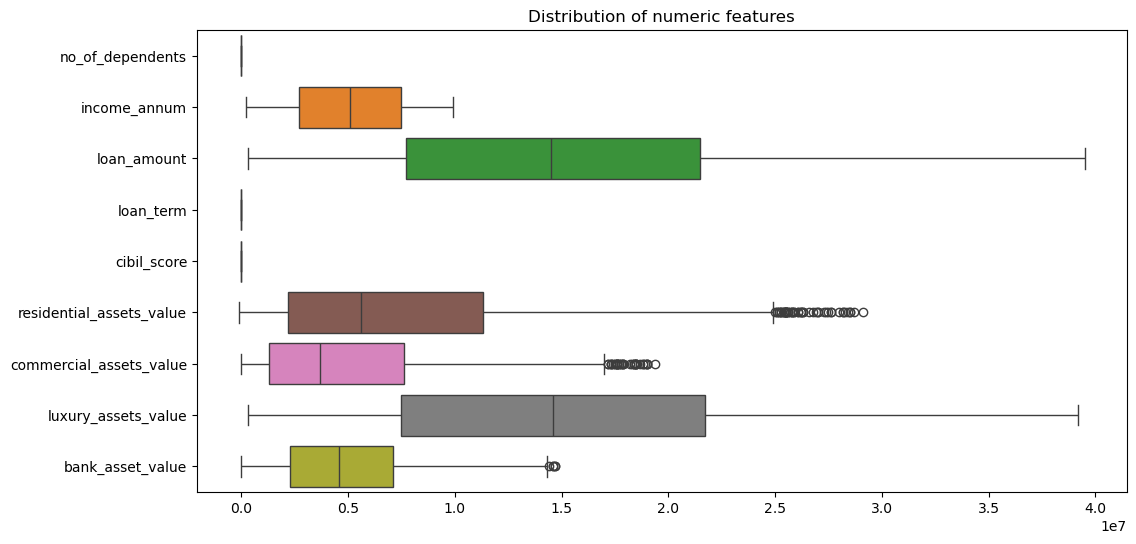

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Distribution of numeric features")
plt.show()


- The scale of values vary substantially between the features. 
- We see the existence of outliers in residential_assets_value, commercial_assets_value, and bank_asset_value.

Both these points motivate the use of standardisation to ensure well suitedness to a logistic ridge regression model.

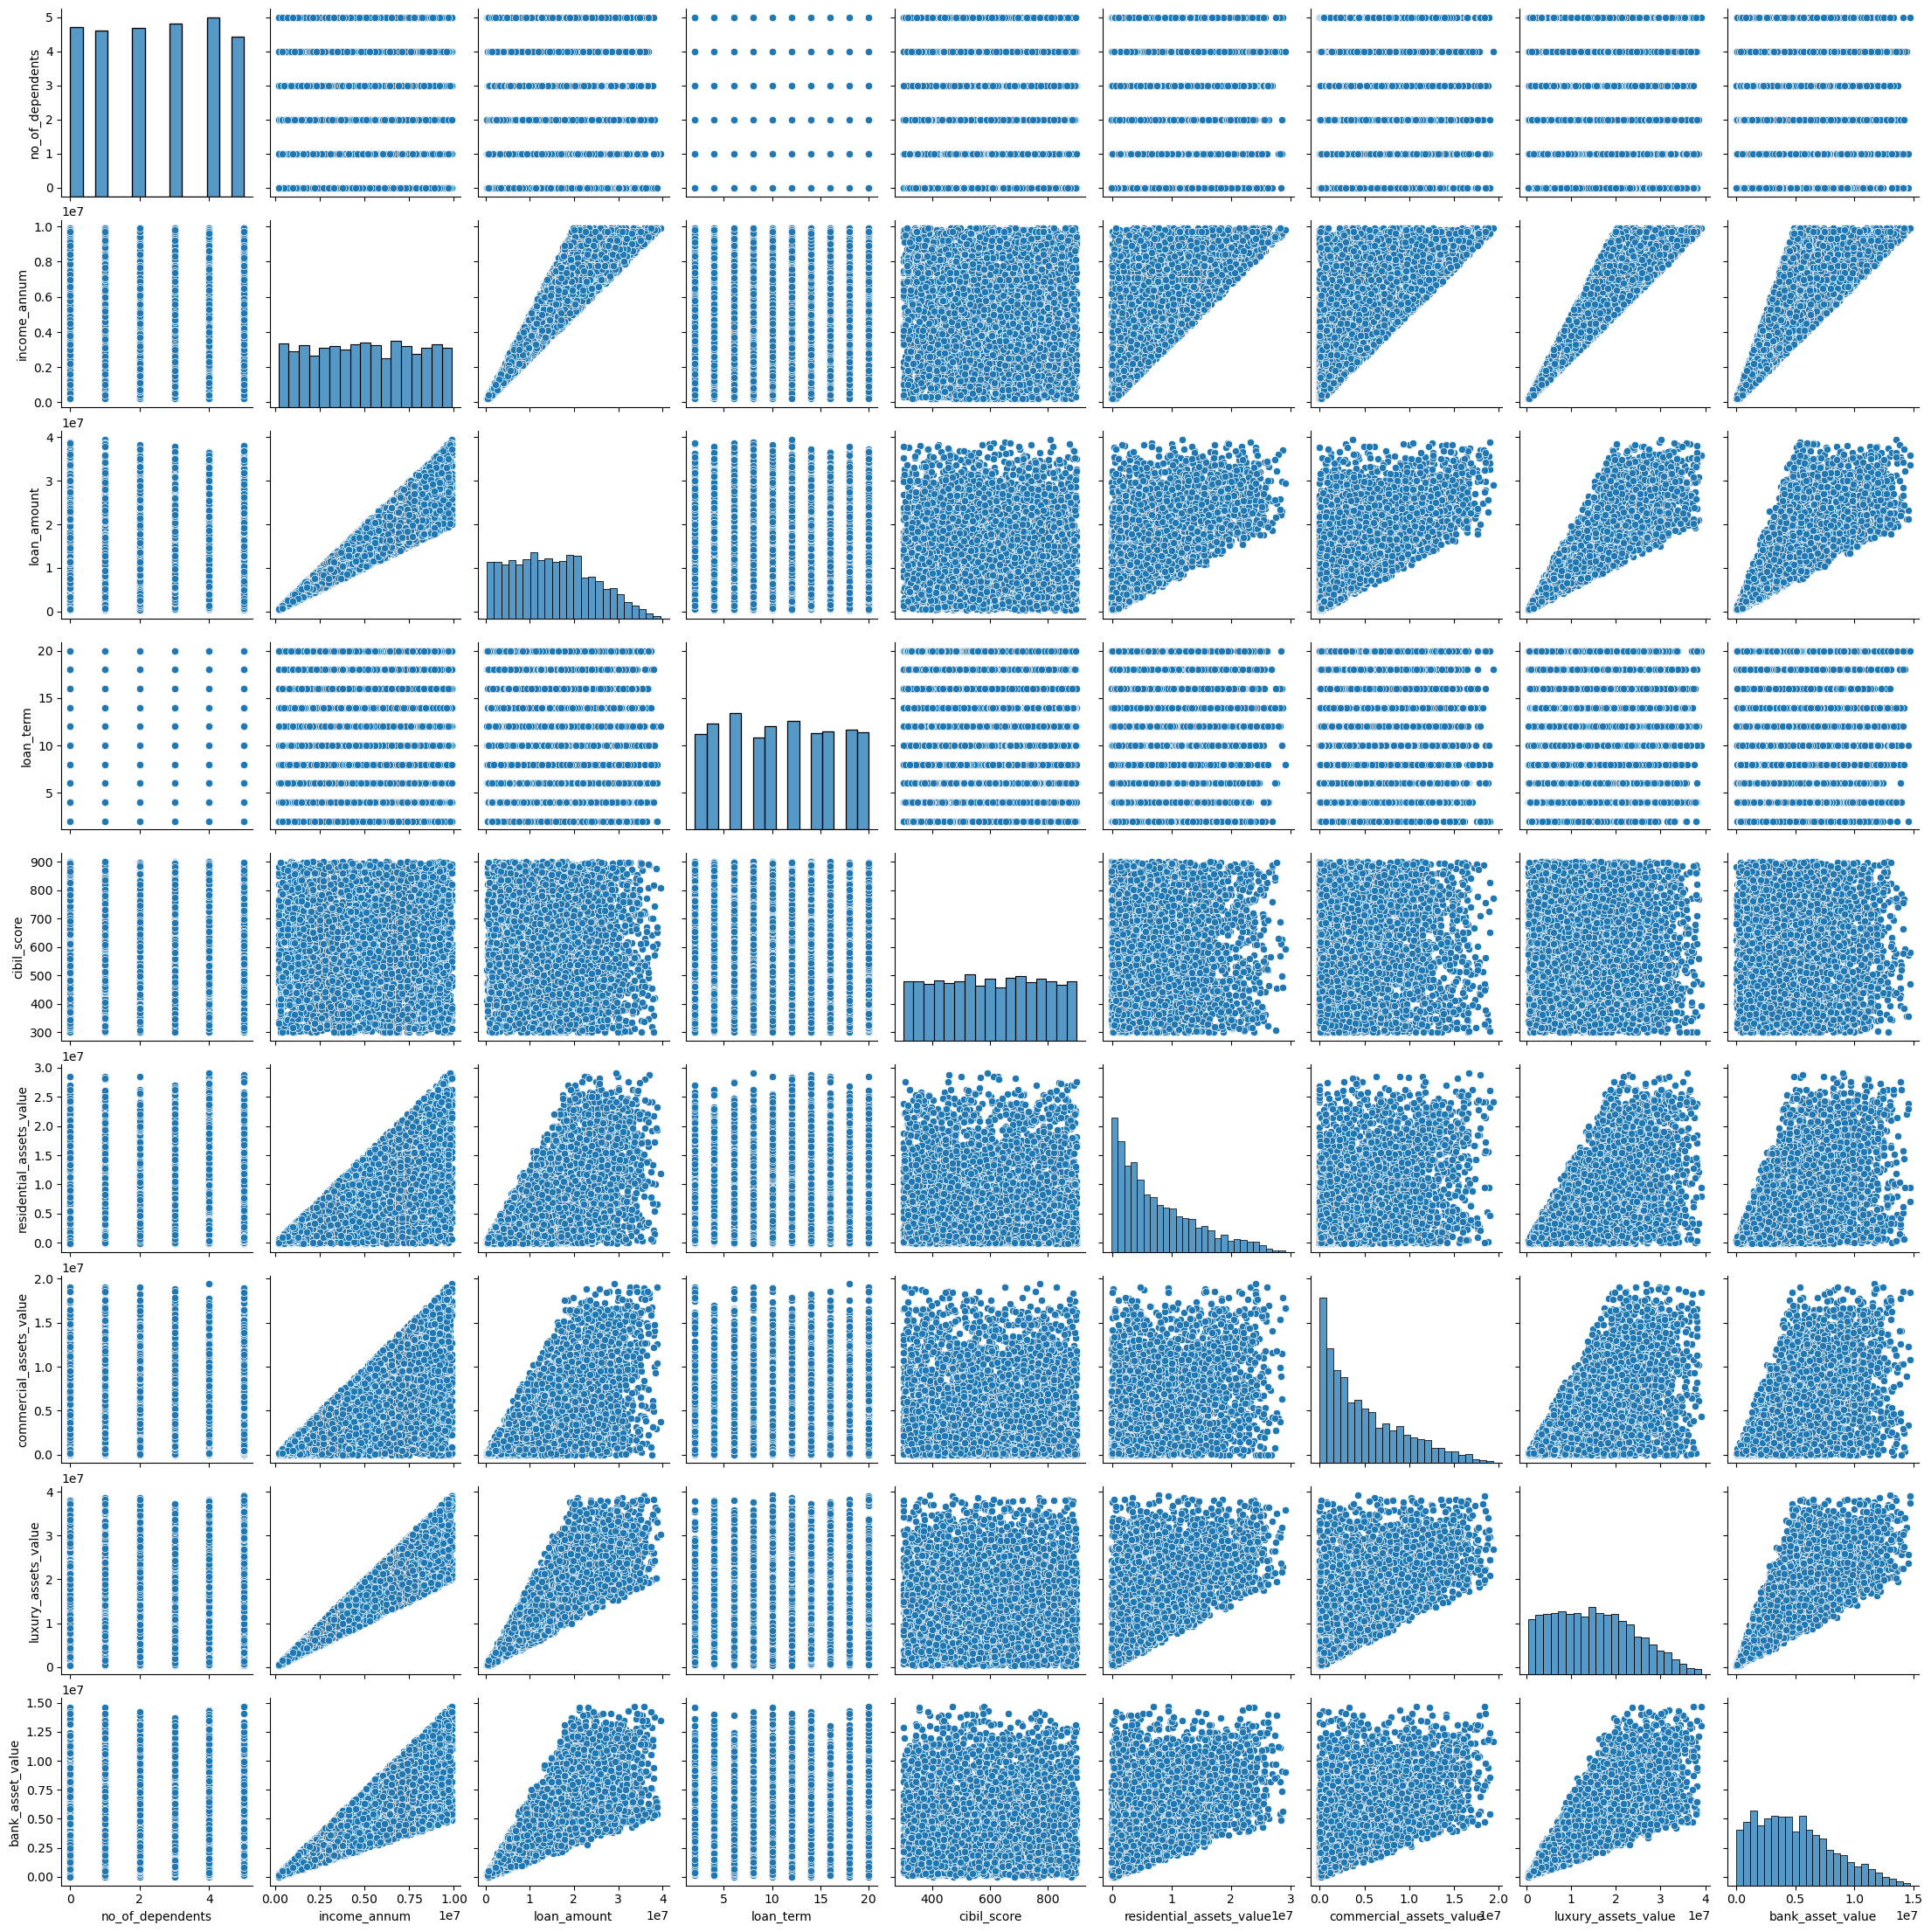

In [121]:
sns.pairplot(df)

We can see some notable correlations between some of the variables:
- loan_amount & income_annum
- income_annum & asset features
- luxury_assets_value & bank_asset_value

#### Correlation Analysis

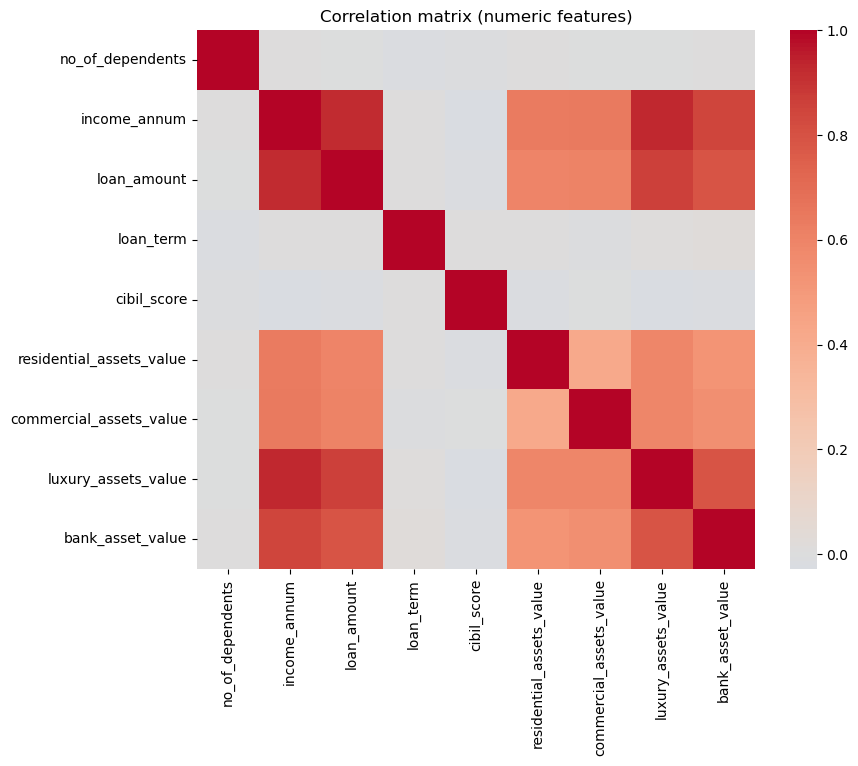

In [122]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation matrix (numeric features)")
plt.show()


**Notable strong linear correlations:**
- income_annum & loan_amount
    - Makes sense since higher income -> larger loans
- luxury_assets_value & income_annum 
- luxury_assets_value & loan_amount
- bank_asset_value & income_annum 
- bank_asset_value & loan_amount

**Weakly correlated variables**:
- cibil_score
- loan_term
- no_of_dependents

We will keep all variables for now since they may contribute in modelling when combined with other features, keeping in mind that correlation between inputs does not imply redudancy with respect to the target. Ridge regression will be used to address multicollinearity.

- Drastically different scales -> require standardisation
- Some outliers present in columns ["residential_assets_value", "commerical_assets_value", "bank_asset_value"]

### Categorial Data Distrbution

In [123]:
for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())



education
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

self_employed
self_employed
Yes    2150
No     2119
Name: count, dtype: int64

loan_status
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


We see that there are no severe imbalanced in the categorical data.

### Features vs Target

#### Numerical

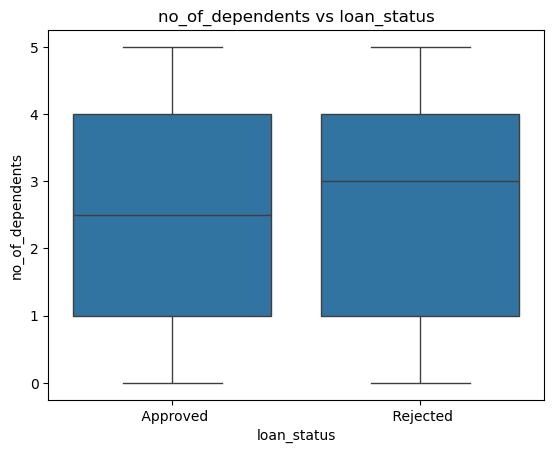

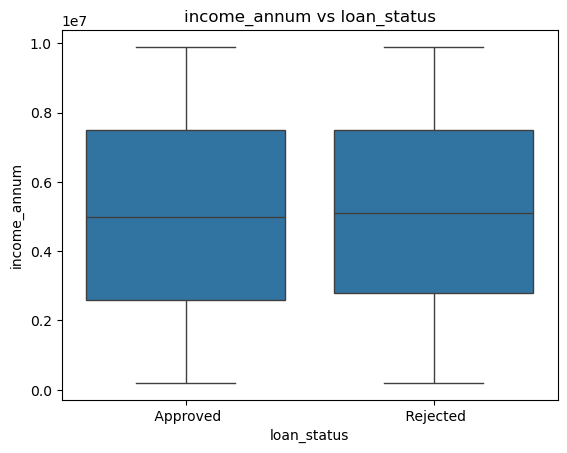

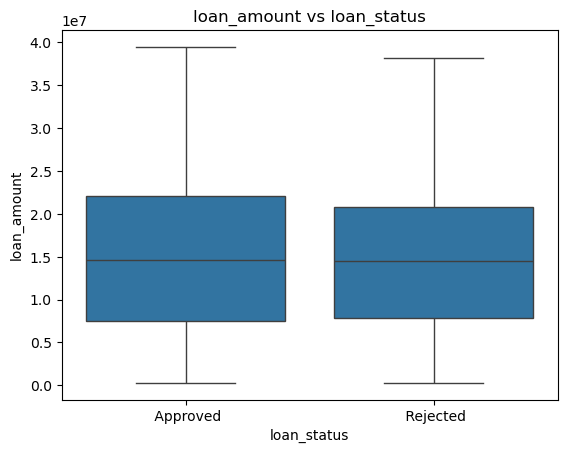

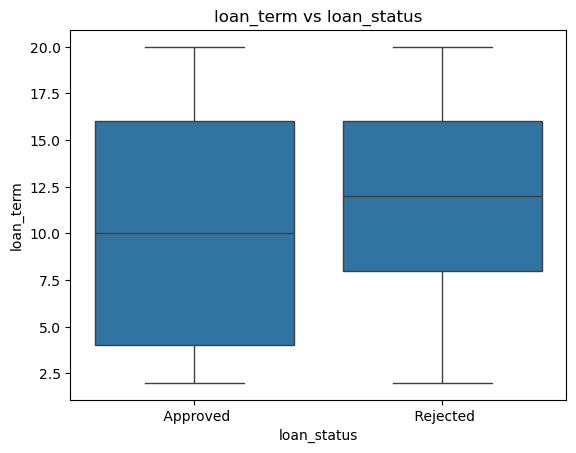

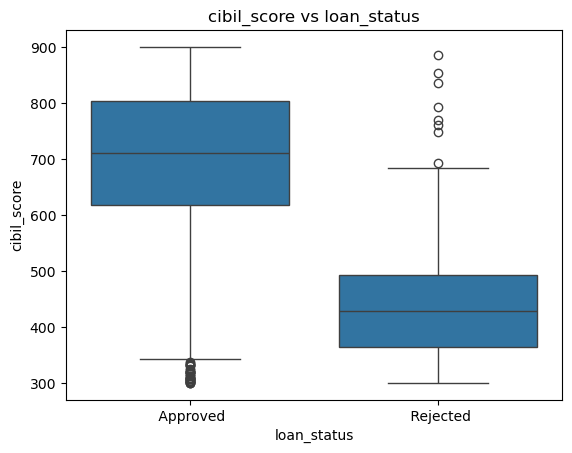

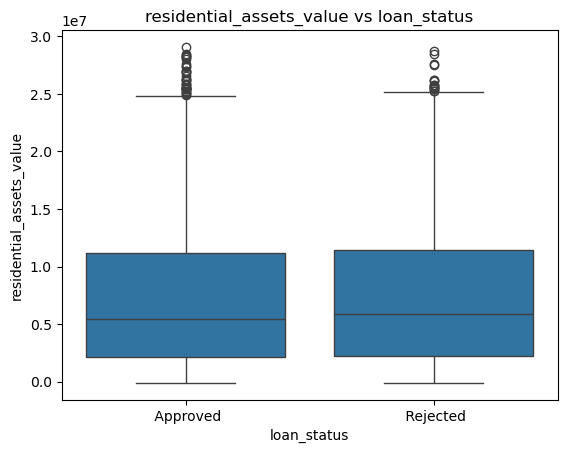

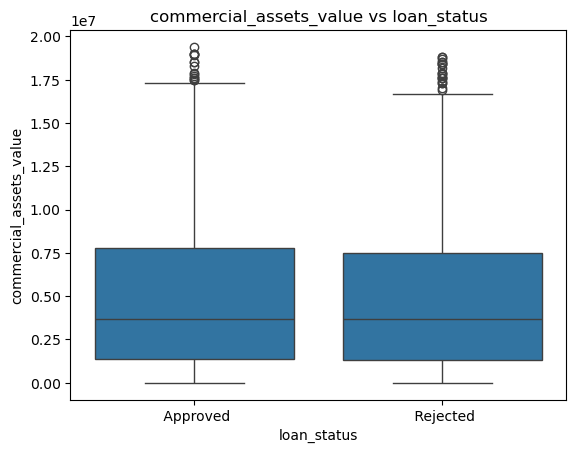

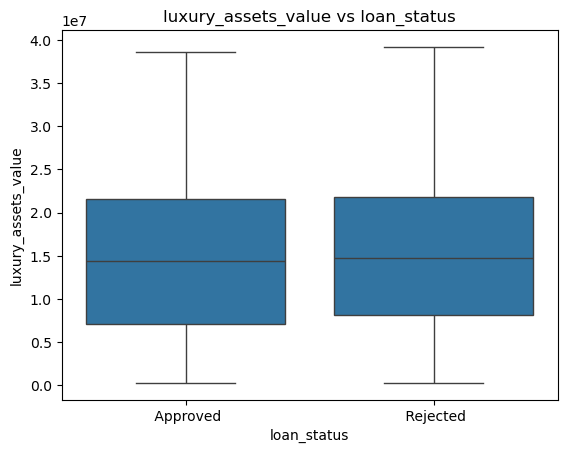

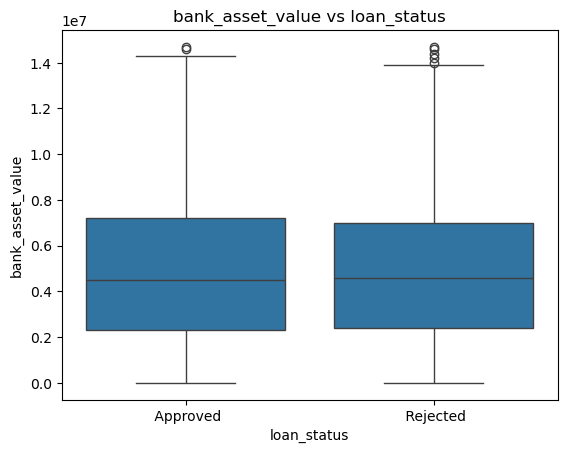

In [124]:
target="loan_status"

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} vs loan_status")
    plt.show()


no_of_dependents, loan_term and cibi_score seem to differentiate well between loan status. The others don't but will be kept because they may contribute strongly when modelled alongside other variables.

#### Categorical

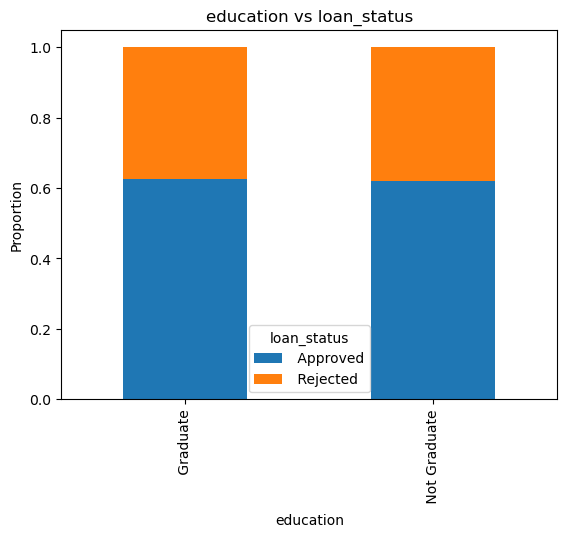

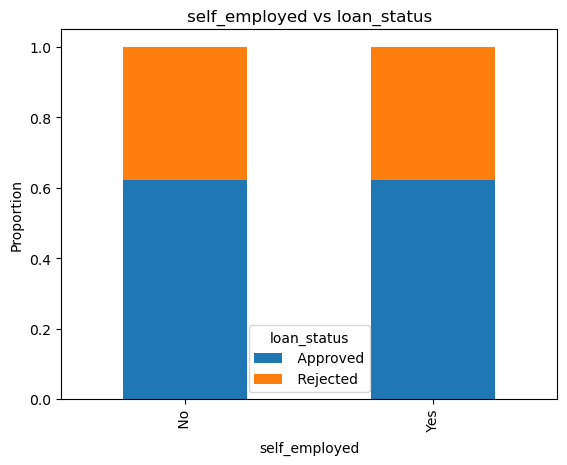

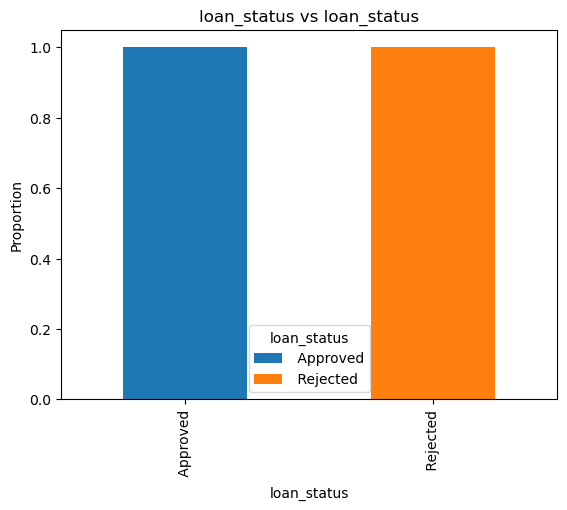

In [125]:
for col in categorical_cols:
    ct = pd.crosstab(df[col], df[target], normalize="index")
    ct.plot(kind="bar", stacked=True)
    plt.title(f"{col} vs loan_status")
    plt.ylabel("Proportion")
    plt.show()


These figures show the relationship between the categorical predictors (education and self_employed) and the target (loan_status).
In both cases, the proportion of approved and rejected are very similar across categories, suggesting that these variables alone don't strongly differentiate between loan_status.
We will still keep this because they may contribute in modelling when combined with other features.

## Modelling (NumPy only)

### Helper Functions

#### Data Splitting and Preprocessing

In [126]:
def train_test_split(X_num, X_cat, y, test_ratio=0.2, seed=42):
    rng = np.random.default_rng(seed)
    n = X_num.shape[0]
    idx = rng.permutation(n)

    test_size = int(test_ratio * n)
    test_idx = idx[:test_size]
    train_idx = idx[test_size:]

    return (
        X_num[train_idx], X_num[test_idx],
        X_cat[train_idx], X_cat[test_idx],
        y[train_idx], y[test_idx]
    )

def one_hot_encode_train(col):
    values = np.unique(col)
    mapping = {v: i for i, v in enumerate(values)}

    O = np.zeros((len(col), len(values)))
    for i, v in enumerate(col):
        O[i, mapping[v]] = 1.0

    return O, mapping


def one_hot_encode_test(col, mapping):
    O = np.zeros((len(col), len(mapping)))
    for i, v in enumerate(col):
        if v in mapping:
            O[i, mapping[v]] = 1.0
    return O

def standardise(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1.0
    return (X - mu) / sigma, mu, sigma

#### Ridge Logistic Regression: Model, Loss, and Gradient

In [127]:
def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column,data_inputs]
    return X_matrix

def logistic_function(inputs):
    inputs = np.clip(inputs, -40, 40)
    return 1 / (1 + np.exp(-inputs))

def model_function(data_matrix, weights):
    return data_matrix @ weights

def binary_logistic_regression_cost_function(data_matrix, data_labels, weights, alpha=0.0):
    z = model_function(data_matrix, weights)
    z = np.clip(z, -40, 40)  # stability

    # logistic loss
    loss = np.mean(np.log(1 + np.exp(z)) - data_labels * z)

    # ridge penalty (bias not penalised)
    ridge = 0.5 * alpha * np.sum(weights[1:] ** 2)
    return loss + ridge

def binary_logistic_regression_gradient(data_matrix, data_labels, weights, alpha=0.0):
    p = logistic_function(model_function(data_matrix, weights))
    grad = (data_matrix.T @ (p - data_labels)) / len(data_matrix)

    # ridge gradient (no penalty on bias)
    grad[1:] += alpha * weights[1:]
    return grad


#### Optimisation

In [128]:
def gradient_descent_2(objective,gradient,initial_weights,data_matrix, labels,step_size=1,no_of_iterations=100,print_output=10):
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights,data_matrix, labels))
    
    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights,data_matrix, labels)
        objective_values.append(objective(weights,data_matrix, labels))
    return weights, objective_values

#### Prediction and Thresholding

In [129]:
def binary_prediction_function(data_matrix, weights):
    probs = logistic_function(model_function(data_matrix, weights))
    return (probs >= 0.5).astype(int)   

def binary_prediction_function_threshold(data_matrix, weights, threshold):
    probs = logistic_function(model_function(data_matrix, weights))
    return (probs >= threshold).astype(int)


#### Evaludation Metrics and ROC Analysis

In [130]:
def classification_accuracy(predicted_labels, true_labels):
    predicted_labels = predicted_labels.reshape(-1).astype(int)
    true_labels = true_labels.reshape(-1).astype(int)
    return np.mean(predicted_labels == true_labels)

def confusion_counts(y_true, y_pred):
    y_true = y_true.reshape(-1).astype(int)
    y_pred = y_pred.reshape(-1).astype(int)
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tn, fp, fn, tp

def get_ROC(data_matrix, weights, delta_t, labels):
    threshold = 0.0
    values = []

    while threshold <= 1.0 + 1e-12:
        predicted_labels = binary_prediction_function_threshold(
            data_matrix, weights, threshold
        )
        tn, fp, fn, tp = confusion_counts(labels, predicted_labels)
        TPR = tp / (tp + fn) if (tp + fn) else 0.0
        FPR = fp / (fp + tn) if (fp + tn) else 0.0
        values.append([FPR, TPR, threshold])
        threshold += delta_t

    return np.array(values)



#### K-Fold Cross Validation

In [131]:
def KFold_split(data_size, k, seed=42):
    rng = np.random.default_rng(seed)
    indices = rng.permutation(data_size)
    return np.array_split(indices, k)

def KFold_logistic(input_data, labels, K, cost_function, gradient_function, seed=42):
    data_size = len(input_data)
    indexes_split = KFold_split(data_size, K, seed=seed)

    average_accuracy = 0.0
    
    # design matrix just for shape
    data_matrix_full = linear_regression_data(input_data)
    optimal_weights_k_fold = np.zeros((data_matrix_full.shape[1], 1))
    
    for i in range(K):
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])

        data_matrix = linear_regression_data(input_data[training_indexes])

        initial_weights = np.zeros((data_matrix.shape[1], 1))

        
        step_size = 3.9 * len(data_matrix) / (np.linalg.norm(data_matrix) ** 2)

        optimal_weights, objective_values_ = gradient_descent_2(
            cost_function, gradient_function,
            initial_weights, data_matrix,
            labels[training_indexes],
            step_size, 2000, 0 
        )

        data_matrix_test = linear_regression_data(input_data[indexes_split[i]])
        predicted_labels = binary_prediction_function(data_matrix_test, optimal_weights)

        accuracy_rate = classification_accuracy(predicted_labels, labels[indexes_split[i]])
        average_accuracy += accuracy_rate / K

        optimal_weights_k_fold += optimal_weights / K

    return optimal_weights_k_fold, average_accuracy

### Load Data

In [132]:
with open(DATA_PATH, "r") as f:
    header = f.readline().strip().split(",")

header = [h.strip() for h in header]

In [133]:
target_col = "loan_status"

# Identify Numeric and Categorical Cols:
target_col = "loan_status"

numeric_cols = [
    "no_of_dependents",
    "income_annum",
    "loan_amount",
    "loan_term",
    "cibil_score",
    "residential_assets_value",
    "commercial_assets_value",
    "luxury_assets_value",
    "bank_asset_value"
]

categorical_cols = ["education", "self_employed"]

numeric_idx = [header.index(col) for col in numeric_cols]
categorical_idx = [header.index(col) for col in categorical_cols]
target_idx = header.index(target_col)

In [134]:
# Numerical
X_num = np.genfromtxt(
    DATA_PATH,
    delimiter=",",
    skip_header=1,
    usecols=numeric_idx
)

X_num = X_num.reshape((X_num.shape[0], len(numeric_idx)))

# Categorical
X_cat = np.genfromtxt(
    DATA_PATH,
    delimiter=",",
    skip_header=1,
    usecols=categorical_idx,
    dtype=str
)

X_cat = np.char.strip(X_cat)

# Target
y_raw = np.genfromtxt(
    DATA_PATH,
    delimiter=",",
    skip_header=1,
    usecols=[target_idx],
    dtype=str
)

y_raw = np.char.strip(y_raw)
y = (y_raw == "Approved").astype(int).reshape((-1, 1))

### Split and Standardise

We standardise all numerical features to account for the large scale differences, while preserving the original distribution of the data. When standardising the test data, we make sure to use the mean and standard deviation values calculated from the training set. This prevents future bias when testing on the training set.

In [135]:
# Train/Test Split:
X_num_tr, X_num_te, X_cat_tr, X_cat_te, y_tr, y_te = train_test_split(X_num, X_cat, y)

# Standardise Numerical features
X_num_tr_std, mu_num, sigma_num = standardise(X_num_tr)
X_num_te_std = (X_num_te - mu_num) / sigma_num

Categorical features are one-hot encoded.
Resulting in the 'education' and 'self_employed' columns being removed, and the following added:
- education_Graduate
- education_Not_Graduate
- self_employed_Yes
- self_employed_No

In [136]:
# Train
O_tr_list, mappings = [], []

for j in range(X_cat_tr.shape[1]):
    O, mapping = one_hot_encode_train(X_cat_tr[:, j])
    O_tr_list.append(O)
    mappings.append(mapping)

X_cat_tr_oh = np.hstack(O_tr_list)

# Test
O_te_list = []
for j in range(X_cat_te.shape[1]):
    O_te_list.append(one_hot_encode_test(X_cat_te[:, j], mappings[j]))

X_cat_te_oh = np.hstack(O_te_list)

In [137]:
X_tr = np.hstack([X_num_tr_std, X_cat_tr_oh])
X_te = np.hstack([X_num_te_std, X_cat_te_oh]) # We don't add a ones column here since this will be handled within the call to KFold_logistic

print(X_tr.shape, X_te.shape)

(3416, 13) (853, 13)


### Fit Model

For 7 different values of the regularisation parameter $\alpha$, we fit a ridge-regularised logistic regression model by minimising the empirical risk. The optimisation problem is

$$
\hat{w}_\alpha
=
\arg\min_{w \in \mathbb{R}^{d+1}}
\left[
\frac{1}{s}
\sum_{i=1}^s
\Big(
\log(1 + e^{\langle w, x_i \rangle})
-
y_i \langle w, x_i \rangle
\Big)
+
\frac{\alpha}{2}\,\lVert w_{1:} \rVert_2^2
\right].
$$

This optimisation problem is solved using batch gradient descent, with step size $\tau$ chosen as

$$
\tau = \frac{3.9\, s}{\|X\|_2^2},
$$

where $\|X\|_2$ denotes the spectral norm of the design matrix. This allows for stable convergence of the the optimisation problem.

The objective decreases monotonically and stabilises well before the maximum number of iterations, indicating successful convergence.


In [138]:
K = 5
alpha_grid = [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

cv_results = []

for alpha in alpha_grid:
    cost_fn = lambda w, X, y: binary_logistic_regression_cost_function(X, y, w, alpha=alpha)
    grad_fn = lambda w, X, y: binary_logistic_regression_gradient(X, y, w, alpha=alpha)

    w_cv, cv_acc = KFold_logistic(X_tr, y_tr, K, cost_fn, grad_fn, seed=42)
    cv_results.append((alpha, cv_acc))
    print(f"alpha={alpha:<8}  CV accuracy={cv_acc:.5f}")

best_alpha, best_cv_acc = max(cv_results, key=lambda t: t[1])
print("\nBest alpha:", best_alpha, "Best CV accuracy:", best_cv_acc)


alpha=0.0       CV accuracy=0.91276
alpha=1e-06     CV accuracy=0.91276
alpha=1e-05     CV accuracy=0.91276
alpha=0.0001    CV accuracy=0.91306
alpha=0.001     CV accuracy=0.91364
alpha=0.01      CV accuracy=0.91364
alpha=0.1       CV accuracy=0.89959

Best alpha: 0.01 Best CV accuracy: 0.9136412284982833


In [139]:
best_cost_fn = lambda w, X, y: binary_logistic_regression_cost_function(X, y, w, alpha=best_alpha)
best_grad_fn = lambda w, X, y: binary_logistic_regression_gradient(X, y, w, alpha=best_alpha)

X_train_design = linear_regression_data(X_tr)
w0 = np.zeros((X_train_design.shape[1], 1))
step_size = 3.9 * len(X_train_design) / (np.linalg.norm(X_train_design) ** 2)

w_final, obj_vals = gradient_descent_2(
    best_cost_fn, best_grad_fn,
    w0, X_train_design, y_tr,
    step_size=step_size,
    no_of_iterations=3000,
    print_output=300
)


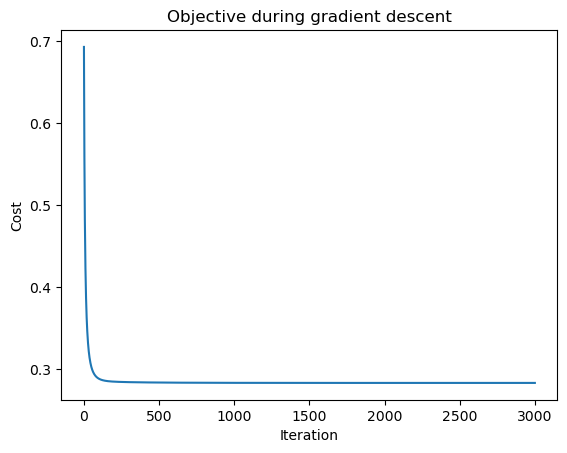

In [140]:
plt.figure()
plt.plot(obj_vals)
plt.title("Objective during gradient descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()


### Analysis

In [141]:
X_test_design = linear_regression_data(X_te)
y_test_pred = binary_prediction_function(X_test_design, w_final)

test_acc = classification_accuracy(y_test_pred, y_te)
tn, fp, fn, tp = confusion_counts(y_te, y_test_pred)

print("\nFINAL MODEL TEST RESULTS")
print("Accuracy:", test_acc)
print("Misclassification rate:", 1 - test_acc)
print("TN, FP, FN, TP:", tn, fp, fn, tp)

precision = tp / (tp + fp) if (tp + fp) else 0.0
recall = tp / (tp + fn) if (tp + fn) else 0.0
fpr = fp / (fp + tn) if (fp + tn) else 0.0

print("Precision:", precision)
print("Recall/TPR:", recall)
print("FPR:", fpr)



FINAL MODEL TEST RESULTS
Accuracy: 0.9191090269636577
Misclassification rate: 0.0808909730363423
TN, FP, FN, TP: 313 34 35 471
Precision: 0.9326732673267327
Recall/TPR: 0.9308300395256917
FPR: 0.09798270893371758


In [142]:
y_prob_ours = logistic_function(X_test_design @ w_final).ravel()
y_pred_ours = (y_prob_ours >= 0.5).astype(int)


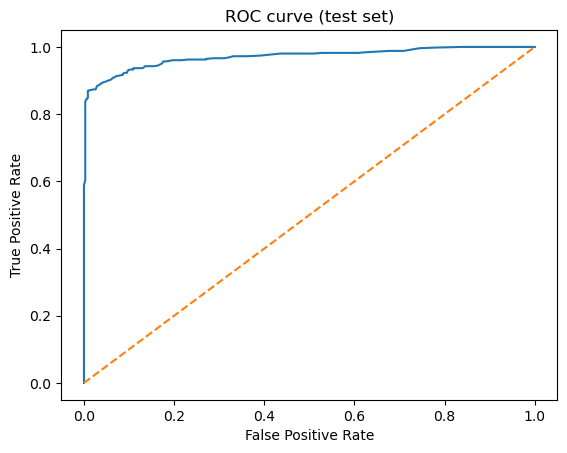

In [143]:
roc_vals = get_ROC(X_test_design, w_final, delta_t=0.01, labels=y_te)

plt.figure()
plt.plot(roc_vals[:,0], roc_vals[:,1])
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve (test set)")
plt.show()


We see that our model when used on the test set has strong discriminative ability, with an AUC of approximately 0.97. This indicates that the model is effective at ranking approved and rejected loan applications across a wide range of decision thresholds.

In [144]:
feature_names = (
    numeric_cols +
    [f"education_{k}" for k in mappings[0].keys()] +
    [f"self_employed_{k}" for k in mappings[1].keys()]
)

coefficients = w_final[1:].reshape(-1)   # don't consider bias
intercept = w_final[0, 0]

coef_table = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefficients,
    "abs_coefficient": np.abs(coefficients)
}).sort_values("abs_coefficient", ascending=False)

coef_table


,feature,coefficient,abs_coefficient
4,cibil_score,2.746573,2.746573
3,loan_term,-0.515443,0.515443
1,income_annum,-0.366109,0.366109
2,loan_amount,0.319814,0.319814
12,self_employed_Yes,0.060216,0.060216
11,self_employed_No,-0.054409,0.054409
7,luxury_assets_value,0.045738,0.045738
6,commercial_assets_value,0.037311,0.037311
9,education_Graduate,0.024823,0.024823
10,education_Not Graduate,-0.019016,0.019016


Each coefficient here represents the effect of this variable on the log-odds of loan approval holding all other variables fixed. Keep in mind that we have multiple highly correlated financial variables.

Some insights:
- Credit score (cibil_score) is by far the most influential predictor. This is consistent with real-world practices.
- Very negative loan_term coefficients implies that longer repayment periods are associated with higher default risk, so lower approval probability.
- The income_annum coefficient at first is surprising. But this should be interpreted conditionally rather than marginally (on it's own). Due to the strong correlations between income, loan amount, and assets that we saw in the EDA, income gets decomposed into the part already explained by these variables correlated to it, and a residual part (what income adds beyond those). Reasonably, this residual part can correlate negatively with approval. Once loan size and assets are fixed, higher income may indicate aggressive borrowing or higher risk, leading to lower approval probability. Income plays a secondary, conditional role.

## Comparison with other models
We will use scikit-learn to build models to compare against.

In [145]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score

In [146]:
# Helper function for comparison
def summarize_binary(y_true, y_pred, y_prob):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan
    tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan  # recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else np.nan

    fpr_curve, tpr_curve, _ = roc_curve(y_true, y_prob)
    auc_val = auc(fpr_curve, tpr_curve)

    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision,
        "Recall/TPR": tpr,
        "FPR": fpr,
        "AUC": auc_val,
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    }

### Direct Comparison
We compare our model against scikit-learn's own logistic regression with L2 regularisation. This is to check if we've actually implemented logistic regression correctly.
Making sure to use the same train/test split and same standardisation.

The "C" param in sklearn's LogisticRegression(...) corresponds to 1/alpha, where alpha is as before.

In [147]:
# Data. Already standardised.
X_train_skl = X_tr
X_test_skl = X_te

y_train_skl = y_tr.ravel()
y_test_skl = y_te.ravel()

In [148]:
C_value = 1.0 / best_alpha

sk_model = LogisticRegression(
    penalty="l2",
    C=C_value,
    solver="lbfgs",
    max_iter=5000
)

sk_model.fit(X_train_skl, y_train_skl)

/home/sami/miniforge3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",100.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclas

In [149]:
y_pred_skl = sk_model.predict(X_test_skl)
y_prob_skl = sk_model.predict_proba(X_test_skl)[:, 1]

acc_skl = accuracy_score(y_test_skl, y_pred_skl)
cm_skl = confusion_matrix(y_test_skl, y_pred_skl)

print("Sklearn Logistic Regression")
print("Accuracy:", acc_skl)
print("Confusion matrix:\n", cm_skl)

Sklearn Logistic Regression
Accuracy: 0.9214536928487691
Confusion matrix:
 [[317  30]
 [ 37 469]]


### Tree-based Models
Is a linear model sufficient from our problem? Perhaps a non-linear structure provides better insight. We now consider two non-linear tree-based models:
1. Single Decision Tree Classifier
2. Random Forest Classifier

In [150]:
X_train_tree = X_tr
X_test_tree = X_te
y_train_tree = y_tr.ravel()
y_test_tree = y_te.ravel()

#### Decision Tree
- Imported here is a single shallow tree (max depth 5) model.

In [151]:
tree_model = DecisionTreeClassifier(
    max_depth=5,        # shallow tree
    min_samples_leaf=20,
    random_state=42
)

tree_model.fit(X_train_tree, y_train_tree)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [152]:
y_pred_tree = tree_model.predict(X_test_tree)
y_prob_tree = tree_model.predict_proba(X_test_tree)[:, 1]

acc_tree = accuracy_score(y_test_tree, y_pred_tree)
cm_tree = confusion_matrix(y_test_tree, y_pred_tree)

print("Decision Tree")
print("Accuracy:", acc_tree)
print("Confusion matrix:\n", cm_tree)


Decision Tree
Accuracy: 0.9742086752637749
Confusion matrix:
 [[344   3]
 [ 19 487]]


#### Random Forest
- We consider a Random Forest of 300 trees of the same max depth of our single Tree classifier.

In [153]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,          # keep depth same as single tree model
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_tree, y_train_tree) 
y_pred_rf = rf_model.predict(X_test_tree)
y_prob_rf = rf_model.predict_proba(X_test_tree)[:, 1]
acc_rf = accuracy_score(y_test_tree, y_pred_rf)
cm_rf = confusion_matrix(y_test_tree, y_pred_rf)

print("Random Forest")
print("Accuracy:", acc_rf)
print("Confusion matrix:\n", cm_rf)

Random Forest
Accuracy: 0.9648300117233294
Confusion matrix:
 [[341   6]
 [ 24 482]]


### Performance Comparison

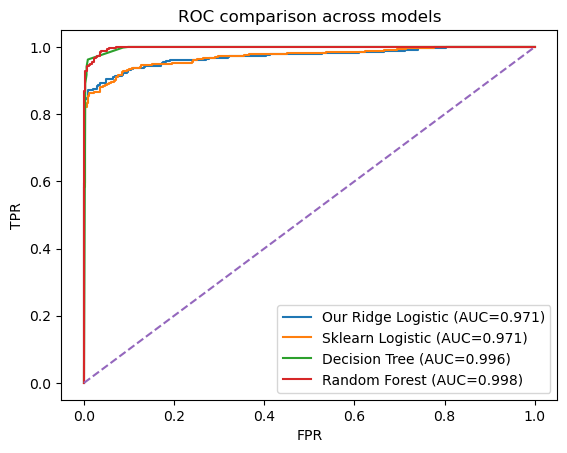

In [154]:
# ROC/AUC for all models:
fpr_ours, tpr_ours, _ = roc_curve(y_test_tree, y_prob_ours)
auc_ours = auc(fpr_ours, tpr_ours)

fpr_skl, tpr_skl, _ = roc_curve(y_test_skl, y_prob_skl)
auc_skl = auc(fpr_skl, tpr_skl)

fpr_tree, tpr_tree, _ = roc_curve(y_test_tree, y_prob_tree)
auc_tree = auc(fpr_tree, tpr_tree)

fpr_rf, tpr_rf, _ = roc_curve(y_test_tree, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

### Performance Comparison (ROC)
plt.figure()
plt.plot(fpr_ours, tpr_ours, label=f"Our Ridge Logistic (AUC={auc_ours:.3f})")
plt.plot(fpr_skl, tpr_skl, label=f"Sklearn Logistic (AUC={auc_skl:.3f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={auc_tree:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title("ROC comparison across models")
plt.show()

In [155]:
y_true = y_te.ravel()

rows = {
    "Our Ridge Logistic (NumPy)": summarize_binary(y_true, y_pred_ours, y_prob_ours),
    "Sklearn Logistic (L2)": summarize_binary(y_true, y_pred_skl, y_prob_skl),
    "Decision Tree (depth=5)": summarize_binary(y_true, y_pred_tree, y_prob_tree),
    "Random Forest (300 trees, depth=5)": summarize_binary(y_true, y_pred_rf, y_prob_rf),
}

results_df = pd.DataFrame(rows).T

results_df_rounded = results_df.copy()
for col in ["Accuracy", "Precision", "Recall/TPR", "FPR", "AUC"]:
    results_df_rounded[col] = results_df_rounded[col].astype(float).round(4)

results_df_rounded

,Accuracy,Precision,Recall/TPR,FPR,AUC,TN,FP,FN,TP
Our Ridge Logistic (NumPy),0.9191,0.9327,0.9308,0.0980,0.9708,313.0,34.0,35.0,471.0
Sklearn Logistic (L2),0.9215,0.9399,0.9269,0.0865,0.9712,317.0,30.0,37.0,469.0
Decision Tree (depth=5),0.9742,0.9939,0.9625,0.0086,0.9964,344.0,3.0,19.0,487.0
"Random Forest (300 trees, depth=5)",0.9648,0.9877,0.9526,0.0173,0.9979,341.0,6.0,24.0,482.0


The ROC curves of all four models are evaluated on the held-out test set. Both ridge-regularised logistic regression implementations (NumPy and scikit-learn) achieve strong and nearly identical performance, with AUC values of approximately 0.97 and very similar accuracy scores, confirming the validity of our implementation.

Both the non-linear models (decision tree & random forest) substantially improve performance. The decision tree achieves both higher accuracy (0.974) and a markedly lower false positive rate. The random forest further performs even better, achieving the highest AUC (0.998), indicating near-perfect separability between approved and rejected applications.

The table reports the full set of classification metrics. While tree-based models outperform linear
models in predictive accuracy, ridge logistic regression remains a strong model, providing a stable baseline in the presence of feature correlation.

## Conclusion

In this study, we implemented ridge-regularised logistic regression from scratch using NumPy and evaluated its performance on a loan approval dataset. Our implementation achieved strong predictive performance on the held-out test set and closely matched the results obtained using scikit-learn’s logistic regression, validating the correctness of the implementation.

The results from the shallow decision tree model show that a non-linear model can achieve higher predictive performance, as is clear by both the accuracy and AUC. However, the ridge logistic regression model remains relevant whilst offering greater interpretability and stability in the presence of correlated features - which we saw exist in our dataset.

Overall, this study highlights the trade-off between predictive performance and interpretability, and demonstrates that regularised linear models provide a strong baseline for structured financial classification problems.
